<a href="https://colab.research.google.com/github/yyujnn/Deep_Learning/blob/main/ex03_iris%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%99%9C%EC%9A%A9_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ex03_iris데이터활용_다중분류실습.ipynb

### 목표
- iris 데이터 활용해서 붓꽃 품종으 분류해보자
- 신경망에서 다중분류 학습하는 모델을 설계해보자

In [ ]:
# 환경셋팅
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
# 데이터 살펴보기
data = load_iris()
# bunch 객체 - 데이터의 묶음
# {키 : 값}
# 키 값을 확인
data.keys()

# 번치객체 - data, target (필수)
# target_names, feature_names, ...(옵션)


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# 특성 확인
data.feature_names
# ['sepal length (cm)', 꽃받침의 길이
#   'sepal width (cm)' 꽃받침의 너비
#   'sepal width (cm)' 꽃잎의 길이
#   'sepal width (cm)'] 꽃잎의 너비

print('특성의 개수 : ', len(data.feature_names))
# 딥러닝 입력층에 연결되는 특성의 개수는 4
# 입력 차원(input_dim) 매개변수에 연결되어져야함

특성의 개수 :  4


In [ ]:
# data 확인
data.data # 데이터 타입 : float
# data['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
# 답 데이터 이름 확인
data.target_names
# ['setosa', 'versicolor', 'virginica']
print('클래스의 개수는?', data.target_names.size)
# 딥러닝 출력층 각 클래스에 대한 확률
# 출력층 퍼셉트론 개수 클래스의 개수만큼 설정
# 퍼셉트론 : units

클래스의 개수는? 3


In [ ]:
# 답 형식 확인
data.target
# ['setosa'-0, 'versicolor'-1, 'virginica'-2]
# 랜덤샘플링 -> train_test_split 1. 무작위로 섞음 2. train, test 분리

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# 훈련, 테스트 데이터 분리
# 8:2
# 3
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target,
                                                    test_size=0.2,
                                                    random_state=3)
print('훈련용 데이터', X_train.shape, y_train.shape)
print('테스트 데이터', X_test.shape, y_test.shape)

훈련용 데이터 (120, 4) (120,)
테스트 데이터 (30, 4) (30,)


In [ ]:
# 답 데이터 원핫인코딩
y_train_oh = pd.get_dummies(y_train) # 더미변수 생성, 원핫인코딩 기능(함수)
y_test_oh = pd.get_dummies(y_test)
# pandas 원핫인코딩 함수 => pd.get_dummies() * 판다스 객체 출력
# keras 제공 원핫인코딩 함수 => to_categorical() * ndarray 출력
# from tensorflow.keras.units import to_categorical

# 크기확인
print(y_train_oh.shape)
print(y_test_oh.shape)

(120, 3)
(30, 3)


In [ ]:
y_train_oh

,0,1,2
0,1,0,0
1,1,0,0
2,0,0,1
3,0,1,0
4,1,0,0
...,...,...,...
115,0,0,1
116,1,0,0
117,1,0,0
118,0,0,1


#### keras 활용 인공신경망 생성
  - 1. 신경망 구조 설계
    - 뼈대 구축, 층 내용 정의
  - 2. 학습/평가 방법 설정
    - 다중 분류에 맞춰서
  - 3. 학습 및 시각화
  - 4. 모델 평가 및 예측

In [ ]:
from ast import mod
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# 1. 신경망 뼈대 구축
model = Sequential()

# 입력층 + 중간층 1 설정
# 뉴런 16, 입력 특성 개수 4개, 활성화 sigmoid
model.add(Dense(units=16, input_dim = 4, activation = 'relu'))
# sigmoid가 학습에 영향을 잘 못 줌 -> 성능 개선이 잘 안됨 relu로 바꿔줌

# 중간층 2개
# 32, 활성화 sigmoid
# 10, 활성화 sigmoid
model.add(Dense(units=32, activation = 'relu'))
model.add(Dense(units=10, activation = 'relu'))

# 출력층
# 다중 분류 :
# class 3개 -> 출력층 유닛 개수 3개
# 활성화 softmax
model.add(Dense(units=3, activation = 'softmax'))

# 모델 요약 정보
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                80        
                                                                 
 dense_5 (Dense)             (None, 32)                544       
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
 dense_7 (Dense)             (None, 3)                 33        
                                                                 
Total params: 987
Trainable params: 987
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 2. 학습/평가 방법 설정
# compile(loss 오차계산, optimizer 최적화함수 : w/b의 위치를 변경, metrics 평가지표)
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',  # 경사하강법 종류 중 1 - 확률적 경사하강
              # 좋은 w,b 를 찾아내는 힘이 부족할 수 있음
              metrics = ['accuracy'] ) # 평가지표 정확도

In [ ]:
# 3. 학습 및 시각화
# 훈련 문제, 훈련답, 200
h2 = model.fit(X_train, y_train_oh, epochs=200)

Epoch 1/200
4/4 [==============================] - 2s 5ms/step - loss: 1.3308 - accuracy: 0.3333
Epoch 2/200
4/4 [==============================] - 0s 8ms/step - loss: 1.2214 - accuracy: 0.3333
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 1.1360 - accuracy: 0.3333
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 1.0723 - accuracy: 0.3333
Epoch 5/200
4/4 [==============================] - 0s 6ms/step - loss: 1.0236 - accuracy: 0.3333
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 0.9899 - accuracy: 0.4917
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 0.9619 - accuracy: 0.6667
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 0.9468 - accuracy: 0.6250
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 0.9300 - accuracy: 0.6167
Epoch 10/200
4/4 [==============================] - 0s 7ms/step - loss: 0.9152 - accuracy: 0.6667
Epoch 11/200
4/4 [===========

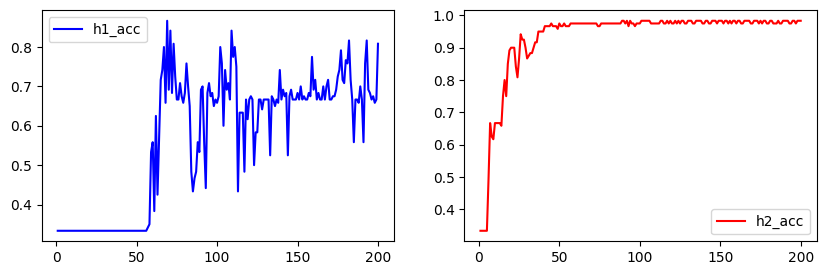

In [ ]:
# 학습 현황 acc 변동 시각화
# 선그래프 그리기
plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
plt.plot(range(1,201), h1.history['accuracy'], label = 'h1_acc', color = 'b')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1,201), h2.history['accuracy'], label = 'h2_acc', color = 'r')
plt.legend()
plt.show()

In [ ]:
# 평가
model.evaluate(X_test, y_test_oh)[1] # 97%

1/1 [==============================] - 0s 227ms/step - loss: 0.0463 - accuracy: 0.9667


0.9666666388511658

In [ ]:
# 예측
# predict
pred = model.predict(X_test)
np.argmax(pred[0]) # 제일 큰 값을 가지고 있는 위치 출력 : np.argmax() => 클래스 값 확인

1/1 [==============================] - 0s 42ms/step


0

In [ ]:
pred.shape

(30, 3)

In [ ]:
X_test.shape

(30, 4)